In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Directamente cargo los archivos para no tener que correr todo el código anterior.
data=pd.read_csv("csv/data.csv")
df_belongs_to_collection=pd.read_csv("csv/collection.csv")
df_production_countries=pd.read_csv("csv/countries.csv")
df_production_companies=pd.read_csv("csv/companies.csv")
df_crew=pd.read_csv("csv/crew.csv")
df_genres=pd.read_csv("csv/genres.csv")
df_cast=pd.read_csv("csv/cast.csv")

# Preparar los df
Hay que ponerlos de forma que se puedan juntar todos a uno (unirlos por id_pelicula, y que cada columna importante tenga su id -cambiar el nombre a aquellos que ya tengan id, para que no se repita el mismo nombre de -) y de ahi decidir las columnas que considero innecesarias para sacarlas.
Más adelante se va a usar los df sin unir para conseguir la información necesaria desde el df que junta 

### data

In [4]:
data.head(1)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_date,release_year,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995-10-30,1995,30000000.0,373554033.0,12.451801


Considero innecesaria la fecha completa de estreno, voy a dejar solo el año.

In [5]:
data.drop(columns='release_date',inplace=True)

In [6]:
data.head(1)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_year,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995,30000000.0,373554033.0,12.451801


In [7]:
type(data['release_year'][0])

numpy.int64

Uno los dataframe a uno grande para realizar el analisis de relaciones entre las variables. Hay df que considere innecesarios de unir (la colección de peliculas, por ej)

Cambio los nombres de los id de cada df para diferenciarlos y que no se superpongan, al cambiarlos voy a poner "df_id" o una abreviación del nombre del df

### countries

Tiene problemas de memoria al ser tan grande, aún asi lo considero innecesario asi que no se va a mergear en el df de todo.<br>
Pero se analizó igual.

In [8]:
df_production_countries.head(1)

,iso_3166_1,name,id_pelicula
0,US,United States of America,862


Como los paises no tienen id les creo unos con el metodo 'factorize' de pandas

In [9]:
a=pd.factorize(df_production_countries['name'])[0]

In [10]:
df_production_countries['countrie_id']=a

In [11]:
df_production_countries

,iso_3166_1,name,id_pelicula,countrie_id
0,US,United States of America,862,0
1,US,United States of America,8844,0
2,US,United States of America,15602,0
3,US,United States of America,31357,0
4,US,United States of America,11862,0
...,...,...,...,...
49403,US,United States of America,30840,0
49404,PH,Philippines,111109,47
49405,US,United States of America,67758,0
49406,RU,Russia,227506,20


In [12]:
df_production_countries[df_production_countries['countrie_id']==100].head(3)

,iso_3166_1,name,id_pelicula,countrie_id
11481,MC,Monaco,28055,100
18296,MC,Monaco,36970,100
19469,MC,Monaco,41211,100


In [13]:
df_production_countries['name_countrie']=df_production_countries['name']
df_production_countries['short_name_countrie']=df_production_countries['iso_3166_1']

df_production_countries.drop(columns=['iso_3166_1','name'],inplace=True)

In [14]:
df_production_countries.shape

(49408, 4)

### companies

Es innecesario para nuestro EDA (en mi opinión) , asi que no lo voy a juntar, pero aún asi decidi analizarlo

In [15]:
df_production_companies.head(5)

,name,id,id_pelicula,revenue
0,Pixar Animation Studios,3.0,862,373554033.0
1,TriStar Pictures,559.0,8844,262797249.0
2,Teitler Film,2550.0,8844,262797249.0
3,Interscope Communications,10201.0,8844,262797249.0
4,Warner Bros.,6194.0,15602,0.0


In [16]:
df_production_companies[df_production_companies['id']==3.0]

,name,id,id_pelicula,revenue
0,Pixar Animation Studios,3.0,862,3.735540e+08
4334,Pixar Animation Studios,3.0,9487,3.632589e+08
5785,Pixar Animation Studios,3.0,863,4.973669e+08
9138,Pixar Animation Studios,3.0,585,5.628163e+08
11950,Pixar Animation Studios,3.0,12,9.403355e+08
15630,Pixar Animation Studios,3.0,9806,6.314421e+08
19881,Pixar Animation Studios,3.0,13925,0.000000e+00
20574,Pixar Animation Studios,3.0,920,4.619831e+08
21808,Pixar Animation Studios,3.0,2062,6.237228e+08
24309,Pixar Animation Studios,3.0,10681,5.213119e+08


In [17]:
df_production_companies['companie_id']=df_production_companies['id']
df_production_companies['companie_name']=df_production_companies['name']
df_production_companies.drop(columns=['id','name','revenue'],inplace=True) #Innecesario tener revenue dos veces, esta columna era copia del df "data"

In [18]:
df_production_companies[df_production_companies['companie_id']==10201]

,id_pelicula,companie_id,companie_name
3,8844,10201.0,Interscope Communications
159,2054,10201.0,Interscope Communications
451,79593,10201.0,Interscope Communications
671,161495,10201.0,Interscope Communications
884,46094,10201.0,Interscope Communications
1167,9057,10201.0,Interscope Communications
1288,46029,10201.0,Interscope Communications
1407,27281,10201.0,Interscope Communications
1434,43634,10201.0,Interscope Communications
1650,11511,10201.0,Interscope Communications


In [19]:
df_production_companies.drop_duplicates()

,id_pelicula,companie_id,companie_name
0,862,3.0,Pixar Animation Studios
1,8844,559.0,TriStar Pictures
2,8844,2550.0,Teitler Film
3,8844,10201.0,Interscope Communications
4,15602,6194.0,Warner Bros.
...,...,...,...
70525,30840,16323.0,20th Century Fox Television
70526,30840,38978.0,CanWest Global Communications
70527,111109,19653.0,Sine Olivia
70528,67758,6165.0,American World Pictures


### genres

In [20]:
df_genres.head(5)

,id,name,id_pelicula
0,16.0,Animation,862
1,35.0,Comedy,862
2,10751.0,Family,862
3,12.0,Adventure,8844
4,14.0,Fantasy,8844


In [21]:
df_genres['genre_id']=df_genres['id']
df_genres['genre_name']=df_genres['name']
df_genres.drop(columns=['id','name'],inplace=True)

In [22]:
df_genres.head(1)

,id_pelicula,genre_id,genre_name
0,862,16.0,Animation


In [23]:
df_genres[df_genres['genre_id']==16]

,id_pelicula,genre_id,genre_name
0,862,16.0,Animation
34,21032,16.0,Animation
124,10530,16.0,Animation
557,15789,16.0,Animation
572,43475,16.0,Animation
...,...,...,...
90837,460135,16.0,Animation
90867,175457,16.0,Animation
90868,184402,16.0,Animation
90958,455661,16.0,Animation


### crew

In [24]:
df_crew.head(5)

,department,gender,id,job,name,id_pelicula
0,Directing,2.0,7879.0,Director,John Lasseter,862
1,Writing,2.0,12891.0,Screenplay,Joss Whedon,862
2,Writing,2.0,7.0,Screenplay,Andrew Stanton,862
3,Writing,2.0,12892.0,Screenplay,Joel Cohen,862
4,Writing,0.0,12893.0,Screenplay,Alec Sokolow,862


In [25]:
df_crew['crew_id']=df_crew['id']
df_crew.drop(columns='id',inplace=True)

In [26]:
df_crew.head(1)

,department,gender,job,name,id_pelicula,crew_id
0,Directing,2.0,Director,John Lasseter,862,7879.0


In [27]:
df_crew['crew_gender']=df_crew['gender']
df_crew['crew_name']=df_crew['name']
df_crew['crew_department']=df_crew['department']
df_crew['crew_job']=df_crew['job']
df_crew.drop(columns=['gender','name','department','job'],inplace=True)

In [28]:
df_crew[df_crew['crew_id']==12893]

,id_pelicula,crew_id,crew_gender,crew_name,crew_department,crew_job
4,862,12893.0,0.0,Alec Sokolow,Writing,Screenplay
24648,9416,12893.0,0.0,Alec Sokolow,Writing,Screenplay
40236,49981,12893.0,0.0,Alec Sokolow,Writing,Screenplay
107520,11007,12893.0,0.0,Alec Sokolow,Writing,Screenplay
119168,8920,12893.0,0.0,Alec Sokolow,Writing,Screenplay
161082,9513,12893.0,0.0,Alec Sokolow,Writing,Screenplay
457621,430448,12893.0,0.0,Alec Sokolow,Production,Producer


### Cast

En el caso de cast ya contaba con cast_id pero se encontraban repetidos en gran proporción y no parecen dar información importante en el df_cast, parece más un id que diferencia el cast dentro de cada pelicula solamente, haciendo que los id se repitan ya que para cada pelicula este id se reinicia, por lo tanto no nos sirve.

En su lugar vamos a utilizar los valores de la columna id que se repiten solamente por la repetición de trabajos de una misma persona, es decir, este id pertenece a una persona en particular(es único).

In [29]:
df_cast.head(4)

,cast_id,character,gender,id,name,order,id_pelicula
0,14.0,Woody (voice),2.0,31.0,Tom Hanks,0.0,862
1,15.0,Buzz Lightyear (voice),2.0,12898.0,Tim Allen,1.0,862
2,16.0,Mr. Potato Head (voice),2.0,7167.0,Don Rickles,2.0,862
3,17.0,Slinky Dog (voice),2.0,12899.0,Jim Varney,3.0,862


In [30]:
df_cast['cast_id'].value_counts()

4.0       26777
5.0       25655
3.0       25594
6.0       24006
2.0       22846
          ...  
344.0         1
1099.0        1
1098.0        1
1097.0        1
438.0         1
Name: cast_id, Length: 574, dtype: int64

In [31]:
df_cast['id'].value_counts()

121323.0     241
113.0        148
4165.0       125
2231.0       123
16927.0      110
            ... 
1748750.0      1
1088588.0      1
1722007.0      1
28519.0        1
1261758.0      1
Name: id, Length: 206158, dtype: int64

In [32]:
df_cast[df_cast['cast_id']==4.0].head(3)

,cast_id,character,gender,id,name,order,id_pelicula
41,4.0,Ariel Gustafson,1.0,13567.0,Ann-Margret,2.0,15602
49,4.0,Robin Stokes,1.0,51359.0,Lela Rochon,3.0,31357
59,4.0,Annie Banks-MacKenzie,1.0,70696.0,Kimberly Williams-Paisley,3.0,11862


In [33]:
df_cast[df_cast['order']==1]

,cast_id,character,gender,id,name,order,id_pelicula
1,15.0,Buzz Lightyear (voice),2.0,12898.0,Tim Allen,1.0,862
14,8.0,Samuel Alan Parrish / Van Pelt,2.0,8537.0,Jonathan Hyde,1.0,8844
40,3.0,John Gustafson,2.0,3151.0,Jack Lemmon,1.0,15602
47,2.0,Bernadine 'Bernie' Harris,1.0,9780.0,Angela Bassett,1.0,31357
57,2.0,Nina Banks,1.0,3092.0,Diane Keaton,1.0,11862
...,...,...,...,...,...,...,...
562436,2.0,Maid Marian,1.0,139.0,Uma Thurman,1.0,30840
562440,0.0,NaN,1.0,240240.0,Leila Hatami,1.0,439050
562444,1008.0,Homer,0.0,111636.0,Perry Dizon,1.0,111109
562455,7.0,Det. Mark Winston,2.0,2059.0,Adam Baldwin,1.0,67758


In [34]:
df_cast[df_cast['id']==121323.0].head(3)

,cast_id,character,gender,id,name,order,id_pelicula
13755,36.0,Audience Member (uncredited),1.0,121323.0,Bess Flowers,9.0,872
13784,10.0,Fashion Show Spectator,1.0,121323.0,Bess Flowers,5.0,13320
13817,24.0,Diner at Ernie's,1.0,121323.0,Bess Flowers,9.0,426


In [35]:
df_cast['cast_id']=df_cast['id']
df_cast['cast_character']=df_cast['character']
df_cast['cast_name']=df_cast['name']
df_cast['cast_gender']=df_cast['gender']
df_cast['cast_order']=df_cast['order']
df_cast.drop(columns=['id','name','gender','order','character'],inplace=True)

In [36]:
df_cast.head(5)

,cast_id,id_pelicula,cast_character,cast_name,cast_gender,cast_order
0,31.0,862,Woody (voice),Tom Hanks,2.0,0.0
1,12898.0,862,Buzz Lightyear (voice),Tim Allen,2.0,1.0
2,7167.0,862,Mr. Potato Head (voice),Don Rickles,2.0,2.0
3,12899.0,862,Slinky Dog (voice),Jim Varney,2.0,3.0
4,12900.0,862,Rex (voice),Wallace Shawn,2.0,4.0


### collection

In [37]:
df_belongs_to_collection.head(5)

,id,name,id_pelicula,revenue,budget
0,10194,Toy Story Collection,862,373554033.0,30000000.0
1,119050,Grumpy Old Men Collection,15602,0.0,0.0
2,96871,Father of the Bride Collection,11862,76578911.0,0.0
3,645,James Bond Collection,710,352194034.0,58000000.0
4,117693,Balto Collection,21032,11348324.0,0.0


In [38]:
df_belongs_to_collection[df_belongs_to_collection['id']==645].head(5)

,id,name,id_pelicula,revenue,budget
3,645,James Bond Collection,710,352194034.0,58000000.0
236,645,James Bond Collection,714,333011068.0,110000000.0
361,645,James Bond Collection,707,152427960.0,30000000.0
482,645,James Bond Collection,658,124881062.0,2500000.0
483,645,James Bond Collection,657,78898765.0,2000000.0


In [39]:
# Renombro la columna 'name' para distinguirla de otras
df_belongs_to_collection['collection_name']=df_belongs_to_collection['name']
df_belongs_to_collection['collection_id']=df_belongs_to_collection['id']

# Elimino las columnas que duplique en su momento al crear este df, por si acaso.
df_belongs_to_collection.drop(columns=['name','id','revenue','budget'],inplace=True)

In [40]:
df_belongs_to_collection.shape

(4488, 3)

In [41]:
df_belongs_to_collection.head(5)

,id_pelicula,collection_name,collection_id
0,862,Toy Story Collection,10194
1,15602,Grumpy Old Men Collection,119050
2,11862,Father of the Bride Collection,96871
3,710,James Bond Collection,645
4,21032,Balto Collection,117693


In [42]:
df_belongs_to_collection[df_belongs_to_collection['collection_id']==645].head(5)

,id_pelicula,collection_name,collection_id
3,710,James Bond Collection,645
236,714,James Bond Collection,645
361,707,James Bond Collection,645
482,658,James Bond Collection,645
483,657,James Bond Collection,645


## Merge

Este merge es principalmente para ver la tabla de correlaciones de las variables.<br>
A la hora de utilizar parametros la idea es solamente usar los id para predecir (evita errores el usar numeros que identifiquen cada categoria, y también resultan ser dos columnas que dan la misma información la que tienen el nombre con las que tienen el id del nombre).<br>
Luego como mencioné más arriba voy a usar esos id una vez predichos para compararlos con el df que contiene todos sus datos y sacar el dato de nombre de ahi.

In [43]:
df_todo=pd.merge(data,df_genres,on='id_pelicula')
df_todo=pd.merge(df_todo,df_crew,on='id_pelicula')
df_todo=pd.merge(df_todo,df_cast,on='id_pelicula')
df_todo=pd.merge(df_todo,df_belongs_to_collection,on='id_pelicula')

In [44]:
df_todo[df_todo['title']=='Toy Story']

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,...,crew_name,crew_department,crew_job,cast_id,cast_character,cast_name,cast_gender,cast_order,collection_name,collection_id
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,John Lasseter,Directing,Director,31.0,Woody (voice),Tom Hanks,2.0,0.0,Toy Story Collection,10194
1,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,John Lasseter,Directing,Director,12898.0,Buzz Lightyear (voice),Tim Allen,2.0,1.0,Toy Story Collection,10194
2,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,John Lasseter,Directing,Director,7167.0,Mr. Potato Head (voice),Don Rickles,2.0,2.0,Toy Story Collection,10194
3,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,John Lasseter,Directing,Director,12899.0,Slinky Dog (voice),Jim Varney,2.0,3.0,Toy Story Collection,10194
4,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,John Lasseter,Directing,Director,12900.0,Rex (voice),Wallace Shawn,2.0,4.0,Toy Story Collection,10194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,Mickie McGowan,Production,ADR Voice Casting,12901.0,Sid (voice),Erik von Detten,2.0,8.0,Toy Story Collection,10194
4130,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,Mickie McGowan,Production,ADR Voice Casting,12133.0,Mrs. Davis (voice),Laurie Metcalf,1.0,9.0,Toy Story Collection,10194
4131,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,Mickie McGowan,Production,ADR Voice Casting,8655.0,Sergeant (voice),R. Lee Ermey,2.0,10.0,Toy Story Collection,10194
4132,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,...,Mickie McGowan,Production,ADR Voice Casting,12903.0,Hannah (voice),Sarah Freeman,1.0,11.0,Toy Story Collection,10194


In [45]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

C:\Users\lasso\AppData\Local\Temp\ipykernel_11484\2648953045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_todo.corr()


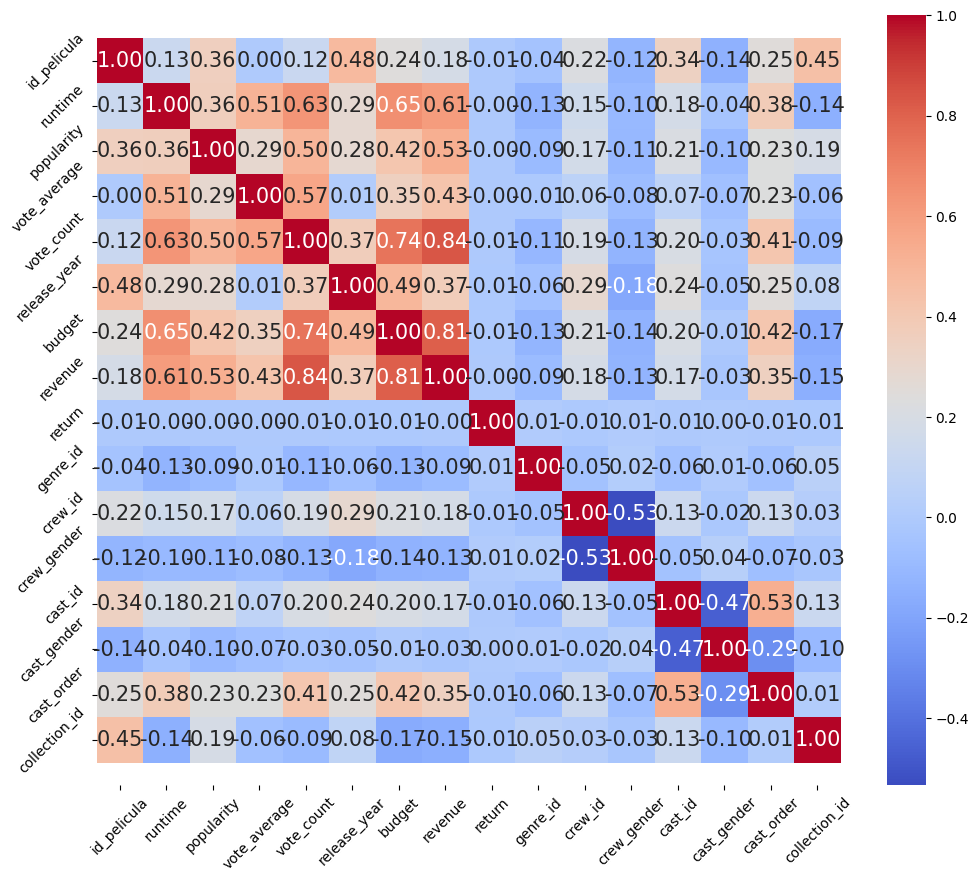

In [46]:
corr = df_todo.corr()
plot_corre_heatmap(corr)

In [47]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\lasso\AppData\Local\Temp\ipykernel_11484\1398619703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,id_pelicula,runtime,popularity,vote_average,vote_count,release_year,budget,revenue,return
id_pelicula,1.000000,-0.119459,-0.082459,-0.165231,-0.064505,0.286901,-0.101335,-0.071016,-0.006757
runtime,-0.119459,1.000000,0.129686,0.156774,0.113532,0.078834,0.134770,0.103961,0.000892
popularity,-0.082459,0.129686,1.000000,0.153755,0.559933,0.131704,0.449587,0.506178,0.003215
vote_average,-0.165231,0.156774,0.153755,1.000000,0.123608,0.026142,0.073179,0.083813,0.005590
vote_count,-0.064505,0.113532,0.559933,0.123608,1.000000,0.106810,0.676610,0.812011,0.003598
release_year,0.286901,0.078834,0.131704,0.026142,0.106810,1.000000,0.131700,0.088372,-0.005017
budget,-0.101335,0.134770,0.449587,0.073179,0.676610,0.131700,1.000000,0.768759,-0.002137
revenue,-0.071016,0.103961,0.506178,0.083813,0.812011,0.088372,0.768759,1.000000,0.000791
return,-0.006757,0.000892,0.003215,0.005590,0.003598,-0.005017,-0.002137,0.000791,1.000000


In [48]:
corr = data.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

C:\Users\lasso\AppData\Local\Temp\ipykernel_11484\1079212280.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='pearson')


,id_pelicula,runtime,popularity,vote_average,vote_count,release_year,budget,revenue,return
id_pelicula,1.000000,-0.119459,-0.082459,-0.165231,-0.064505,0.286901,-0.101335,-0.071016,-0.006757
runtime,-0.119459,1.000000,0.129686,0.156774,0.113532,0.078834,0.134770,0.103961,0.000892
popularity,-0.082459,0.129686,1.000000,0.153755,0.559933,0.131704,0.449587,0.506178,0.003215
vote_average,-0.165231,0.156774,0.153755,1.000000,0.123608,0.026142,0.073179,0.083813,0.005590
vote_count,-0.064505,0.113532,0.559933,0.123608,1.000000,0.106810,0.676610,0.812011,0.003598
release_year,0.286901,0.078834,0.131704,0.026142,0.106810,1.000000,0.131700,0.088372,-0.005017
budget,-0.101335,0.134770,0.449587,0.073179,0.676610,0.131700,1.000000,0.768759,-0.002137
revenue,-0.071016,0.103961,0.506178,0.083813,0.812011,0.088372,0.768759,1.000000,0.000791
return,-0.006757,0.000892,0.003215,0.005590,0.003598,-0.005017,-0.002137,0.000791,1.000000


In [49]:
corr = data.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

C:\Users\lasso\AppData\Local\Temp\ipykernel_11484\877727796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='spearman')


,id_pelicula,runtime,popularity,vote_average,vote_count,release_year,budget,revenue,return
id_pelicula,1.000000,-0.205643,-0.410247,-0.149199,-0.433418,0.391852,-0.255321,-0.277609,-0.261655
runtime,-0.205643,1.000000,0.307084,0.193286,0.290415,0.034097,0.226998,0.254152,0.234045
popularity,-0.410247,0.307084,1.000000,0.241311,0.893465,0.185738,0.463002,0.490852,0.447129
vote_average,-0.149199,0.193286,0.241311,1.000000,0.317564,-0.008572,0.071814,0.126549,0.119619
vote_count,-0.433418,0.290415,0.893465,0.317564,1.000000,0.196972,0.483905,0.512956,0.473880
release_year,0.391852,0.034097,0.185738,-0.008572,0.196972,1.000000,0.141145,0.103541,0.086596
budget,-0.255321,0.226998,0.463002,0.071814,0.483905,0.141145,1.000000,0.644420,0.775064
revenue,-0.277609,0.254152,0.490852,0.126549,0.512956,0.103541,0.644420,1.000000,0.852689
return,-0.261655,0.234045,0.447129,0.119619,0.473880,0.086596,0.775064,0.852689,1.000000


C:\Users\lasso\AppData\Local\Temp\ipykernel_11484\4191156472.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_todo.corr(method='pearson')


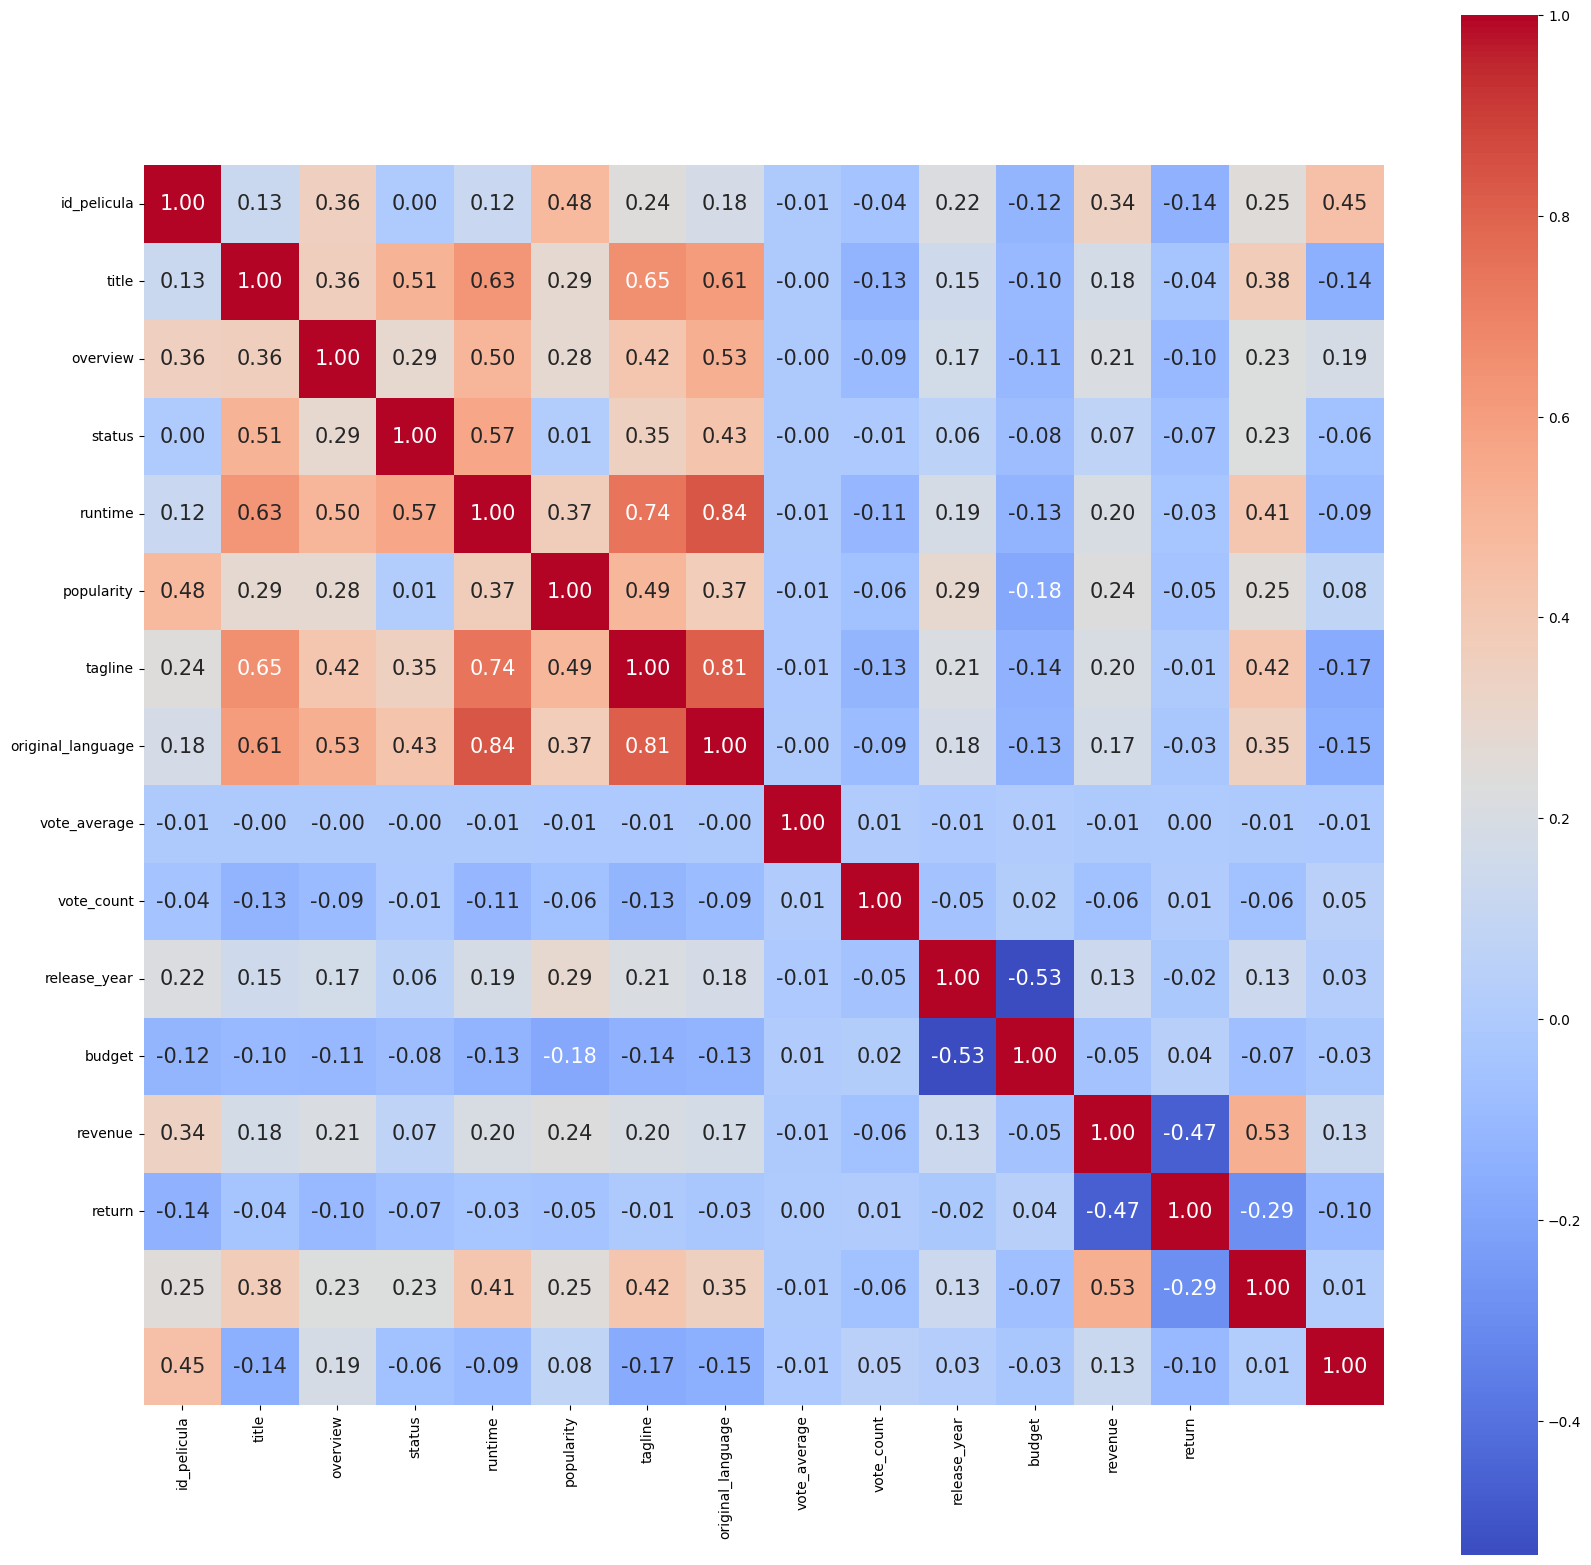

In [50]:
corr = df_todo.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')

plt.show()

In [51]:
df_todo.columns

Index(['id_pelicula', 'title', 'overview', 'status', 'runtime', 'popularity',
       'tagline', 'original_language', 'vote_average', 'vote_count',
       'release_year', 'budget', 'revenue', 'return', 'genre_id', 'genre_name',
       'crew_id', 'crew_gender', 'crew_name', 'crew_department', 'crew_job',
       'cast_id', 'cast_character', 'cast_name', 'cast_gender', 'cast_order',
       'collection_name', 'collection_id'],
      dtype='object')

Antes de continuar con el EDA, yo ya considero como columnas innecesarias:<br>
- tagline
- title (se va a usar el "id_pelicula" para identificarlas.)
- crew_job
- crew_department
- crew_name (usamos el crew_id para identificar)
- cast_character
- cast_name (usamos cast_id)
- collection_name
- overview
- Hacer status a valor numerico y luego eliminar la columna de strings.
- original_language
- genre_name (usamos el genre_id)

Principalmente todo lo que sea texto, y fue introducido por id, se quita su nombre en texto y se deja solamente el id que lo representa.<br>
El resto que no esta representado por id, es innecesario.<br>
Antes de seguir el anali, borro las columnas asi optimizamos la rápidez y el uso de recursos.

In [52]:
df_todo.drop(inplace=True,columns=['overview','tagline','title','original_language','crew_job','crew_department','crew_name','cast_character','cast_name','collection_name','genre_name'])

In [53]:
sns.pairplot(df_todo, hue = 'popularity')
plt.show()